## Relevant Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load data

In [2]:
raw_data = pd.read_csv('Stats_Season_1')
data = raw_data.copy()

In [3]:
data = data.rename(columns={"Unnamed: 0": "Name"})
data.head()

,Name,Games started,Attempts,Completions,Yards,Touchdowns,Interceptions,Draft Round
0,A.J. McCarron,0,0,0,0,0,0,5
1,Aaron Rodgers,0,16,9,65,0,1,1
2,Alex Smith,7,165,84,875,1,11,1
3,Andrew Luck,16,627,339,4374,23,18,1
4,Andy Dalton,16,516,300,3398,20,13,2


## Statistical overview

In [4]:
data.describe()

,Games started,Attempts,Completions,Yards,Touchdowns,Interceptions,Draft Round
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,6.533333,203.200000,120.444444,1426.333333,7.755556,6.400000,2.800000
std,6.258086,185.055962,111.874840,1354.933964,8.285133,6.187965,2.436465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,27.000000,15.000000,183.000000,0.000000,1.000000,1.000000
50%,5.000000,165.000000,84.000000,949.000000,5.000000,5.000000,1.000000
75%,13.000000,377.000000,230.000000,2818.000000,14.000000,11.000000,4.000000
max,16.000000,627.000000,339.000000,4374.000000,26.000000,20.000000,8.000000


## Check for missing values

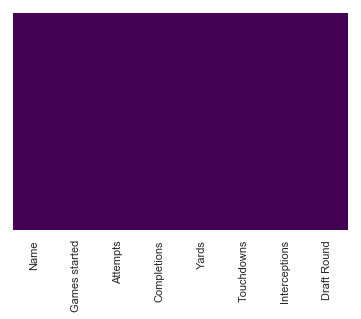

In [5]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

## Distribution skewness

/Users/janfrings/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


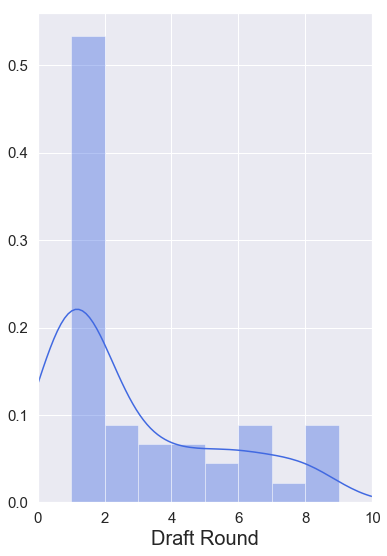

In [6]:
plt.figure(figsize=(6,9))
plt.xlim(0,10)
plt.xlabel('Draft Round',fontsize=20)
plt.tick_params(labelsize=15)
sns.distplot(data['Draft Round'], kde=True, bins=[0,1,2,3,4,5,6,7,8,9], color='royalblue')


## Scatter analysis

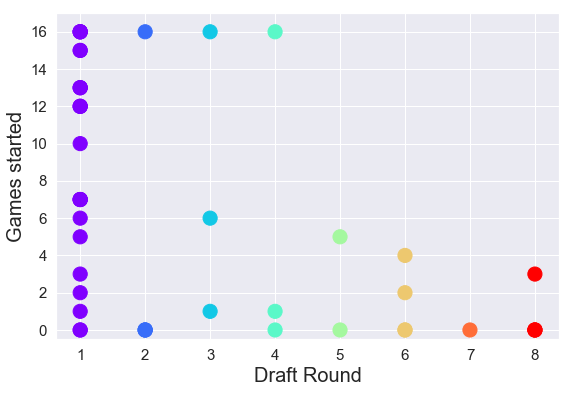

In [7]:
plt.figure(figsize=(9,6))
plt.scatter(data['Draft Round'],data['Games started'],cmap='rainbow',c=data['Draft Round'], s=200)
plt.ylabel('Games started',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(-0.5,17)
plt.tick_params(labelsize=15)

## Elbow method

In [8]:
x = data.iloc[:,1:] #drop names

In [9]:
wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

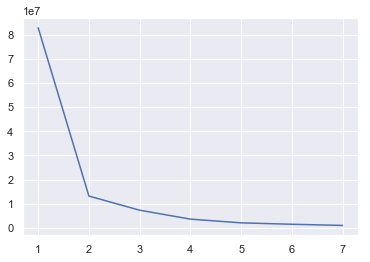

In [10]:
number_of_clusters = range(1,8)
plt.plot(number_of_clusters,wcss)

    • 2 = reasonable number of clusters

## Clustering

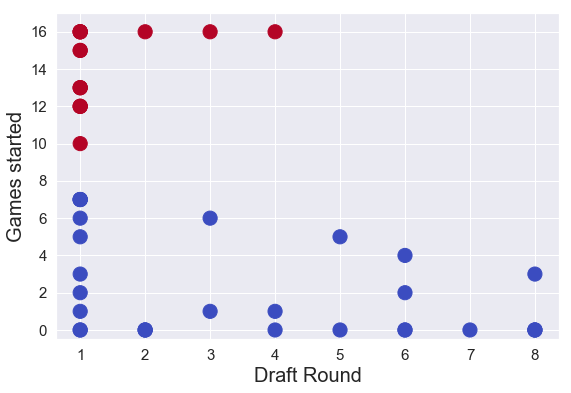

In [11]:
kmeans = KMeans(2)
kmeans.fit(x)
x_cluster = x.copy()
x_cluster['Cluster'] = kmeans.fit_predict(x)

plt.figure(figsize=(9,6))
plt.scatter(x_cluster['Draft Round'],x_cluster['Games started'],c=x_cluster['Cluster'], cmap='coolwarm', s=200)
plt.ylabel('Games started',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(-0.5,17)
plt.tick_params(labelsize=15)

## Correlation

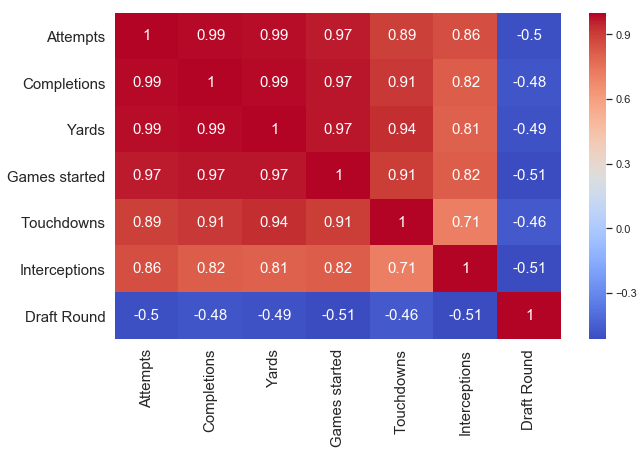

In [12]:
#sort by correlation to dependent variable
number_of_columns = len(data.columns)
corr_order = data.corr().nlargest(number_of_columns, 'Attempts')['Attempts'].index
corr_data = data[corr_order].corr()

#plot
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=15)
sns.heatmap(corr_data, cmap="coolwarm", annot=True, annot_kws={"size":15})

## Stats/Attempts data preperation

In [13]:
data_per_att = data.copy()
data_per_att = data_per_att.iloc[:,2:]

In [14]:
data_per_att['Completions'] = data_per_att['Completions']*100/data_per_att['Attempts']
data_per_att['Yards'] = data_per_att['Yards']/data_per_att['Attempts']
data_per_att['Touchdowns'] = data_per_att['Touchdowns']*100/data_per_att['Attempts']
data_per_att['Interceptions'] = data_per_att['Interceptions']*100/data_per_att['Attempts']

In [15]:
data_per_att = data_per_att.rename(columns={"Completions": "Completion % /Attempt",'Yards':'Yards / Attempt','Touchdowns':'Touchdown % / Attempt', 'Interceptions':'Interception % / Attempt'})

In [16]:
data_per_att_stats = data_per_att.iloc[:,1:5]
data_per_att_stats.head()

,Completion % /Attempt,Yards / Attempt,Touchdown % / Attempt,Interception % / Attempt
0,NaN,NaN,NaN,NaN
1,56.250000,4.062500,0.000000,6.250000
2,50.909091,5.303030,0.606061,6.666667
3,54.066986,6.976077,3.668262,2.870813
4,58.139535,6.585271,3.875969,2.519380


## Statistical overview

In [17]:
data_per_att_stats.describe()

,Completion % /Attempt,Yards / Attempt,Touchdown % / Attempt,Interception % / Attempt
count,42.000000,42.000000,42.000000,42.000000
mean,58.961248,6.871173,3.443948,2.980512
std,9.656026,2.364480,2.866380,1.872377
min,33.333333,2.000000,0.000000,0.000000
25%,54.091906,5.522979,1.513906,1.945397
50%,59.677627,6.961490,3.372490,2.927944
75%,62.415541,7.903598,4.948646,4.148392
max,100.000000,18.000000,12.500000,6.666667


## Check for Outliers

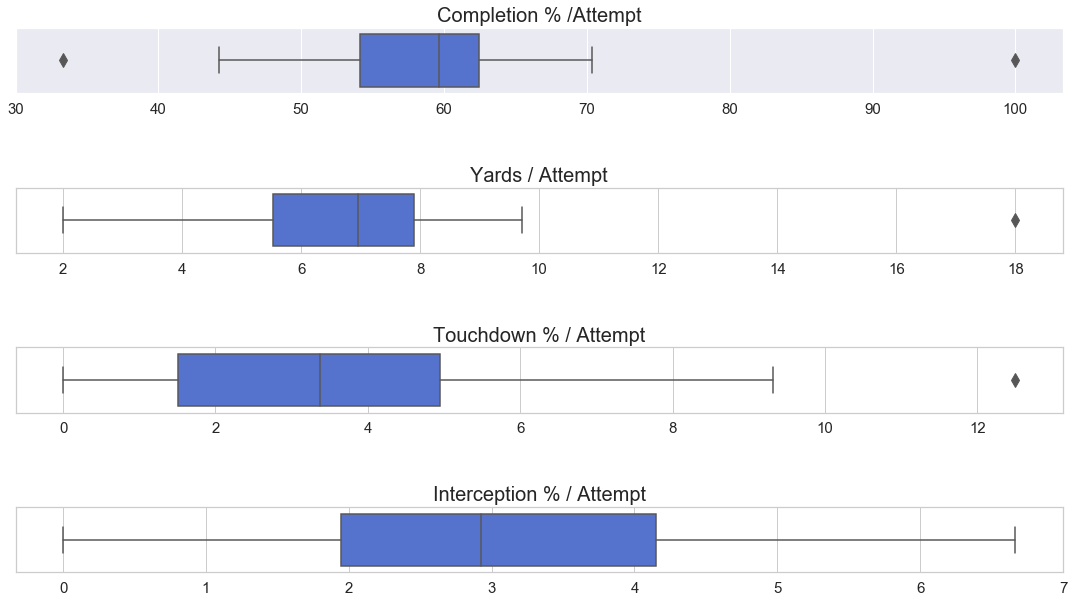

In [18]:
column_values = data_per_att.columns.values

plt.figure(figsize=(15, 12)) #plotsize

for i in range(1,5):
    
    plt.subplot(6,1,i+1) #i+1 indexes the subplot inside the plot
    plt.tight_layout(pad=0, w_pad=0, h_pad=5.0)
    
    current_column = column_values[i] #to get the boxplots one by one for each column
    
    sns.boxplot(data_per_att[current_column], color='royalblue', orient='h', fliersize=10)
    sns.set_style('whitegrid')
    plt.xlabel('')
    plt.title(current_column, fontsize=20, loc='center')
    plt.tick_params(labelsize=15)
    
    

## Scatter Analysis

In [19]:
data_scatter = data_per_att.copy()
data_scatter = data_scatter.drop([1,7,8,11,12,13,16,26,34,35,42,44])

    • removed rows with < 50 attempts

In [20]:
data_scatter.describe()

,Attempts,Completion % /Attempt,Yards / Attempt,Touchdown % / Attempt,Interception % / Attempt,Draft Round
count,33.000000,31.000000,31.000000,31.000000,31.000000,33.000000
mean,271.909091,58.215247,6.905652,3.720867,3.456316,2.363636
std,169.646759,6.121024,1.220117,2.188883,1.405351,2.162438
min,0.000000,44.247788,4.397661,0.000000,0.871460,1.000000
25%,134.000000,53.956570,6.266713,2.289970,2.539546,1.000000
50%,265.000000,59.393939,6.946903,3.482587,3.370787,1.000000
75%,402.000000,61.479368,7.880929,5.049976,4.130117,3.000000
max,627.000000,68.750000,9.708333,9.313725,6.666667,8.000000


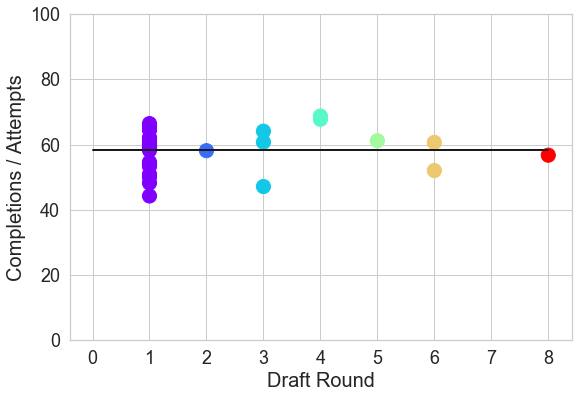

In [21]:
plt.figure(figsize=(9,6))

plt.scatter(data_scatter['Draft Round'],data_scatter['Completion % /Attempt'],cmap='rainbow',c=data_scatter['Draft Round'], s=200)
plt.ylabel('Completions / Attempts',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(0,100)
plt.tick_params(labelsize=18)

plt.plot([0, 8], [58.22, 58.22], 'k-', lw=2)

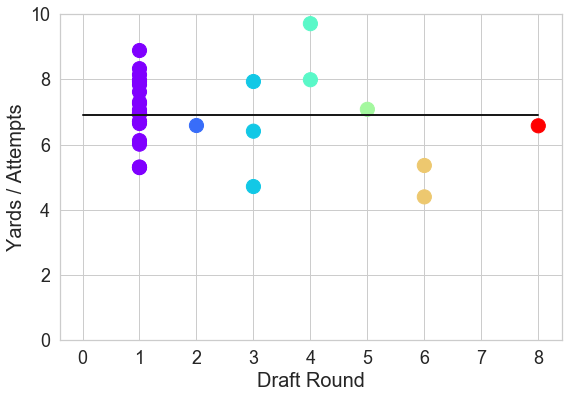

In [22]:
plt.figure(figsize=(9,6))
plt.scatter(data_scatter['Draft Round'],data_scatter['Yards / Attempt'],cmap='rainbow',c=data_scatter['Draft Round'],s=200)
plt.ylabel('Yards / Attempts',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(0,10)
plt.tick_params(labelsize=18)

plt.plot([0, 8], [6.9, 6.9], 'k-', lw=2)

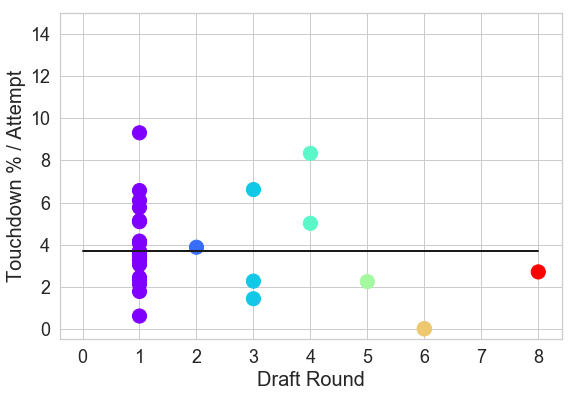

In [23]:
plt.figure(figsize=(9,6))
plt.scatter(data_scatter['Draft Round'],data_scatter['Touchdown % / Attempt'],cmap='rainbow',c=data_scatter['Draft Round'],s=200)
plt.ylabel('Touchdown % / Attempt',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(-0.5,15)
plt.tick_params(labelsize=18)

plt.plot([0, 8], [3.72, 3.72], 'k-', lw=2)

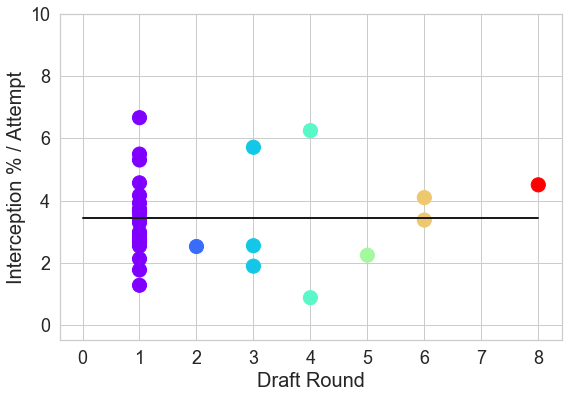

In [24]:
plt.figure(figsize=(9,6))
plt.scatter(data_scatter['Draft Round'],data_scatter['Interception % / Attempt'],cmap='rainbow',c=data_scatter['Draft Round'],s=200)
plt.ylabel('Interception % / Attempt',fontsize=20)
plt.xlabel('Draft Round',fontsize=20)
plt.ylim(-0.5,10)
plt.tick_params(labelsize=18)

plt.plot([0, 8], [3.45, 3.45], 'k-', lw=2)